In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


### Problem 3

Draw random samples from a bivariate normal distribution with 

> $\displaystyle \quad \mu = \begin{bmatrix} 1 \\ 0\end{bmatrix} \quad$ 
> and 
> $\displaystyle \quad C = \begin{bmatrix} 2 & -1 \\ -1 & 2\end{bmatrix}$

1. Generate 200 random numbers that are normally distributed, call this array `X` (1 pt)
2. Reshape `X` to be 2 by 100 representing 100 random 2-vectors, and plot these 2-D points (1 pt)
2. Solve the eigenproblem of the covariance matrix (1 pt)
3. Use the eigenvalues and eigenvectors to transform `X` and calculate the final sample `Z` drawn from the bivariate normal distribution with the above $\mu$ and $C$ (2 pts)
4. Plot the samples (1 pt)

Total of 6 points

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate 200 random numbers that are normally distributed, call this array `X`

In [3]:
mu = matrix('1;0')
C  = matrix('2,-1;-1,2')
X  = np.random.normal(loc = 0, scale = 1, size =200)

#### Reshape `X` to be 2 by 100 representing 100 random 2-vectors, and plot these 2-D points

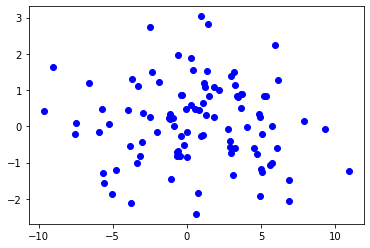

In [4]:
X = reshape(X,(2,100))
Xp = np.copy(X)
Xp[0,:] *= 4;
plot(Xp[0],Xp[1],'bo');

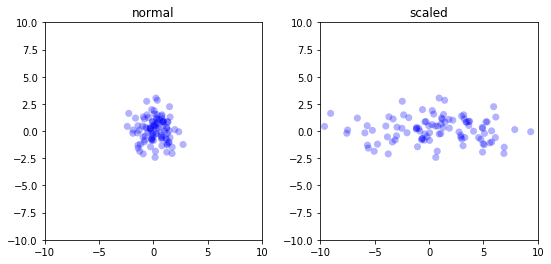

In [5]:
figure(figsize=(14,4)); xlim(-10,10); ylim(-10,10);
subplot(1,3,1).set_aspect('equal'); xlim(-10,10); ylim(-10,10); title('normal')
scatter(X[0,:],X[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
subplot(1,3,2).set_aspect('equal'); xlim(-10,10); ylim(-10,10); title('scaled')
scatter(Xp[0,:],Xp[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');

#### Solve the eigenproblem of the covariance matrix

In [6]:
eVa, eVe= np.linalg.eig(C)
Li =  diag(eVa)

#### Use the eigenvalues and eigenvectors to transform `X` and calculate the final sample `Z` drawn from the bivariate normal distribution with the above $\mu$ and $C$

In [43]:
A =  eVe.dot(sqrt(Li)).dot(Xp)
Ap = A + mu

#### Plot the samples

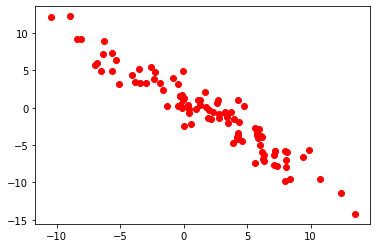

In [44]:
plot(Ap[0],Ap[1],'ro');

#### Display Covariance and Mean of Data set Z to check if Z is valid

In [46]:
print ('The Mean of the data set is %f and %f' % (np.mean(Ap[0]),np.mean(Ap[1])))
print ('The Covariance of the data set Z is:')
print(np.cov(Ap/4))

The Mean of the data set is 1.893267 and -0.734038
The Covariance of the data set Z is:
[[ 1.56967724 -1.52067002]
 [-1.52067002  1.62960284]]


In [36]:
# Scaling matrix
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
#Xa = np.vstack((x, y)).T
Xa = Xp.T


In [37]:
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Rotation matrix
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Transformation matrix
T = Scale.dot(Rot)

# Apply transformation matrix to X
Y = Xa.dot(T)

In [38]:
R, S = eVe, np.diag(np.sqrt(eVa))
T = R.dot(S).T
shape(T)
Yp = Y.T
shape(Yp)
# Transform data with inverse transformation matrix T^-1

(2, 100)

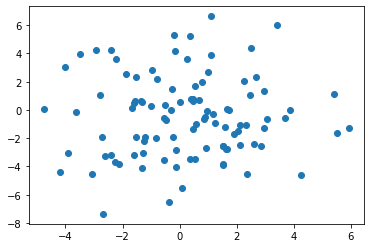

In [39]:
Z = Y.dot(np.linalg.inv(T))
shape(Z)
plot(Z[:, 0], Z[:, 1],'o')